<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

# Données de Satisfaction Clients de la marque Nike

Utilisation des données dans `nike_data.csv`. Ce notebook utilise les fonctions disponnibles dans le module [seaborn](http://seaborn.pydata.org/api.html), vous êtes invité à regarder la [doc](http://seaborn.pydata.org/api.html).

Le principal objectif de ce notebook est de montrer la bonne synergie entre pandas et seaborn lorsqu'il s'agit de construire des réprésentations graphiques de données statistiques.

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm as normal_pdf
sns.set(style="whitegrid", context="notebook", font_scale=1.5)
%matplotlib inline

## Lecture des données

Lire et afficher les données. Vous pouvez utiliser la méthode `head()` pour afficher les premières lignes du tableau. Les données sont dans le fichier `nike_data.csv`, elles peuvent être lues avec la méthode `read_csv` : 

    nike = pd.read_csv()

In [2]:
nike = pd.read_csv("nike_data.csv", sep=";", index_col="Numéro", encoding="latin1")
nike.head()

Age  Utilisation  Sexe  Notoriété  Attitude  Préférence  Intention  \
Numéro                                                                       
1        18            3     2          7         6           5          5   
2        19            1     1          2         2           4          6   
3        20            1     1          3         3           6          7   
4        21            3     2          6         5           5          3   
5        22            3     2          5         4           7          4   

        Fidélité  
Numéro            
1              6  
2              5  
3              6  
4              2  
5              3

## Analyse statistique

Simple calcul des descripteurs statistique avec la méthode `describe` de la dataframe.

In [3]:
nike.describe()

Age  Utilisation       Sexe  Notoriété  Attitude  Préférence  \
count  41.000000    41.000000  41.000000  41.000000  41.00000   41.000000   
mean   24.000000     1.975610   1.439024   4.195122   4.04878    4.268293   
std     3.930649     0.907959   0.502433   1.939323   1.96152    1.565637   
min    18.000000     1.000000   1.000000   1.000000   1.00000    1.000000   
25%    21.000000     1.000000   1.000000   3.000000   3.00000    3.000000   
50%    24.000000     2.000000   1.000000   4.000000   4.00000    4.000000   
75%    27.000000     3.000000   2.000000   6.000000   6.00000    5.000000   
max    30.000000     3.000000   2.000000   7.000000   7.00000    7.000000   

       Intention   Fidélité  
count  41.000000  41.000000  
mean    4.170732   4.000000  
std     1.641683   1.702939  
min     1.000000   1.000000  
25%     3.000000   2.000000  
50%     4.000000   4.000000  
75%     5.000000   5.000000  
max     7.000000   7.000000

Faisons les remplacements suivant :

* Colonne Sexe : 1 pour les femmes et 2 pour les hommes
* Colonne Utilisation : 1 = faible, 2 = moyen, 3 = important

Il faut pour cela utiliser la méthode `apply()`. Vous devez d'abord écrire une fonction qui prend comme argument la valeur de la colonne et retourne `"femme"` ou `"homme"` par exemple, pour le cas de la colonne Sexe. Vous pouvez écraser les colonnes existantes ou créer de nouvelles colonnes. Pour la suite, il faut conserver la colonne Utilisation.

Pour aller plus vite, on peut directement utiliser l'instruction `lambda` comme ci-dessous :

In [4]:
nike["Sexe"] = nike["Sexe"].apply(lambda x: "Homme" if x == 2 else "Femme")
nike["Utilisation_s"] = nike["Utilisation"].apply(lambda x: "faible" if x == 1 else "moyen" if x == 2 else "important")
nike.head()

Age  Utilisation   Sexe  Notoriété  Attitude  Préférence  Intention  \
Numéro                                                                        
1        18            3  Homme          7         6           5          5   
2        19            1  Femme          2         2           4          6   
3        20            1  Femme          3         3           6          7   
4        21            3  Homme          6         5           5          3   
5        22            3  Homme          5         4           7          4   

        Fidélité Utilisation_s  
Numéro                          
1              6     important  
2              5        faible  
3              6        faible  
4              2     important  
5              3     important

Calcul de la mediane après regroupement par type d'utilisation.

In [5]:
nike.groupby(by="Utilisation_s").median()

Age  Utilisation  Notoriété  Attitude  Préférence  Intention  \
Utilisation_s                                                                  
faible         27.0          1.0        2.0       3.0         3.0        5.0   
important      22.5          3.0        6.0       6.0         6.0        3.5   
moyen          23.5          2.0        4.5       4.0         4.0        4.0   

               Fidélité  
Utilisation_s            
faible              5.0  
important           4.0  
moyen               4.0

<div class="alert alert-danger">
<b>Remarque :</b> Le groupe 1 semble plus vieux, le groupe 3 semble contenir plus d'hommes et le groupe 1 plus de femmes (la medianne devrait être de 1.5). Est ce normal ?
</div>

Même chose en groupant par sexe :

In [6]:
nike.groupby("Sexe").median()

Age  Utilisation  Notoriété  Attitude  Préférence  Intention  Fidélité
Sexe                                                                          
Femme  24.0          1.0        3.0       3.0         4.0        5.0       5.0
Homme  23.5          3.0        5.5       4.5         5.0        4.0       4.0

## Distributions des variables

Dans ce qui suit, vous utiliserez la classe [`sns.FacetGrid()`](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) pour représenter différents histogrammes en triant les données.

### Par sexe et niveau d'utilisation

Répartition d'histogrammes sur une grille superposé avec un fit par une distribution normale. Voir l'utilisation de [`sns.FacetGrid()`](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid).

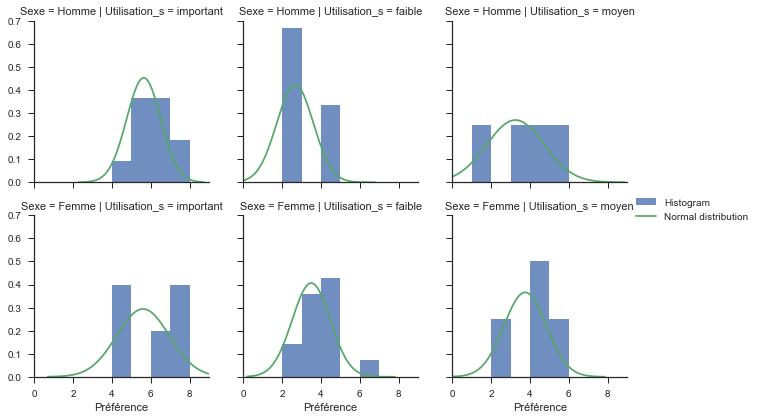

In [7]:
sns.set(style="ticks", font_scale=1.)
plot = sns.FacetGrid(nike, row="Sexe", col="Utilisation_s")
plot.map(sns.distplot, "Préférence", kde=False, fit=normal_pdf, bins=range(1, 9), 
         label="Histogram",
         hist_kws=dict(alpha=.8), 
         fit_kws=dict(color=sns.color_palette()[1], label="Normal distribution"))
plot.set(xlim=(0, 9))
plot.add_legend()

### Notoriété en fonction du sexe 

Histogrammes d'une des variables en triant uniquement sur le sexe.

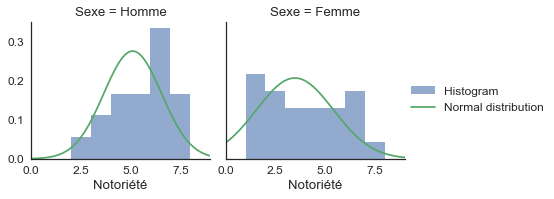

In [10]:
sns.set(style="white", font_scale=1.2)
plot = sns.FacetGrid(nike, col="Sexe", size=3)
plot.map(sns.distplot, "Notoriété", kde=False, fit=normal_pdf, bins=range(1, 10), 
         label="Histogram",
         hist_kws=dict(alpha=.6), 
         fit_kws=dict(color=sns.color_palette()[1], label="Normal distribution"))
plot.add_legend()
plot.set(xlim=(0, 9))

### Fidélité en fonction du sexe 

Histogrammes d'une des variables en triant uniquement sur le sexe.

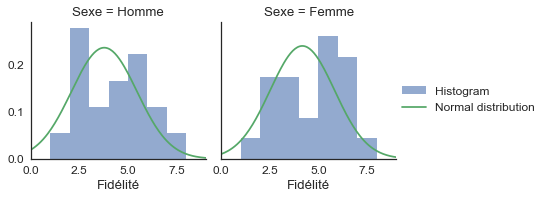

In [11]:
sns.set(style="white", font_scale=1.2)
plot = sns.FacetGrid(nike, col="Sexe")
plot.map(sns.distplot, "Fidélité", kde=False, fit=normal_pdf, bins=range(1, 10), 
         label="Histogram",
         hist_kws=dict(alpha=.6), 
         fit_kws=dict(color=sns.color_palette()[1], label="Normal distribution"))
plot.add_legend()
plot.set(xlim=(0, 9))

### Attitude en fonction du sexe 

Histogrammes d'une des variables en triant uniquement sur le sexe.

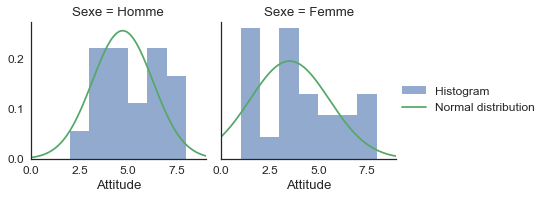

In [13]:
sns.set(style="white", font_scale=1.2)
plot = sns.FacetGrid(nike, col="Sexe", size=3)
plot.map(sns.distplot, "Attitude", kde=False, fit=normal_pdf, bins=range(1, 10), 
         label="Histogram",
         hist_kws=dict(alpha=.6), 
         fit_kws=dict(color=sns.color_palette()[1], label="Normal distribution"))
plot.add_legend()
plot.set(xlim=(0, 9))

### Vue globale des distributions

Avec un violin plot, affichage de la distribution de chaque item de l'enquète avec une comparaison en fonction du sexe.

Il faut d'abord *fondre* le tableau, voir la fonction [`melt` de pandas](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html).

In [14]:
value_vars=["Notoriété", "Attitude", "Préférence", "Intention", "Fidélité"]
nike_melt = pd.melt(nike, value_vars=value_vars, id_vars='Sexe')
nike_melt.head()

Sexe   variable  value
0  Homme  Notoriété      7
1  Femme  Notoriété      2
2  Femme  Notoriété      3
3  Homme  Notoriété      6
4  Homme  Notoriété      5

Maintenant, on crée un [violin plot](http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) :

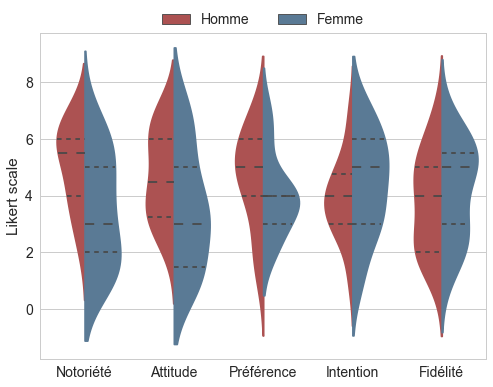

In [18]:
# color and style
sns.set(style="whitegrid", font_scale=1.4)
palette = sns.color_palette("Set1", desat=.6)
# figure
fig = sns.plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x="variable", y="value", hue="Sexe", 
    data=nike_melt, 
    palette=palette,
    inner="quartile", split=True, scale="count"
)
ax.set_ylabel("Likert scale")
ax.set_xlabel("")
# legend
ax.legend(loc="upper center", ncol=2, bbox_to_anchor=(.5, 1.1))

## Comparaison entre notoriété et fidélité

In [19]:
df1 = nike[nike.Notoriété > nike.Fidélité].groupby("Utilisation_s").aggregate({"Notoriété": "count"})
df1.columns = ["Notoriété > Fidélité"]
df1["Notoriété <= Fidélité"] = nike[nike.Notoriété <= nike.Fidélité].groupby("Utilisation_s").aggregate({"Notoriété": "count"})
df1["Nombre total"] = nike.groupby("Utilisation_s").aggregate({"Notoriété": "count"})
df1.loc["Total"]  = df1.sum()
df1

Notoriété > Fidélité  Notoriété <= Fidélité  Nombre total
Utilisation_s                                                           
faible                            3                     14            17
important                        14                      2            16
moyen                             3                      5             8
Total                            20                     21            41

Ou sous forme de pourcentage

In [20]:
df1["Notoriété > Fidélité"] = df1["Notoriété > Fidélité"] / df1["Nombre total"] * 100
df1["Notoriété <= Fidélité"] = df1["Notoriété <= Fidélité"] / df1["Nombre total"] * 100
df1

Notoriété > Fidélité  Notoriété <= Fidélité  Nombre total
Utilisation_s                                                           
faible                    17.647059              82.352941            17
important                 87.500000              12.500000            16
moyen                     37.500000              62.500000             8
Total                     48.780488              51.219512            41

* Pour les utilisateurs de la catégorie faible, la notoriété est plus faible que la fidélité
* Pour les utilisateurs de la catégorie important la notoriété est plus forte que la fidélité
* Pour les utilisateurs de la catégorie moyen, l'écart est plus faible bien que la fidélité l'emporte

## Autres représentation graphiques

Voici, pour exemple, d'autres représentations graphiques des données de cette études. Commençons par charger quelques modules supplémentaires.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter

### Radar chart ou spider chart
Maintenant, on regroupe les valeurs médianne dans un tableau. On associe ensuite à chaque type d'utilisation une couleur et un nom.

In [27]:
ut3 = nike.groupby(by="Utilisation").aggregate("median")
ut3["Couleur"] = ['#f1c40f', '#1abc9c', '#8e44ad']
ut3["Nom"] = ['Utilisation faible', 'Utilisation modérée', 'Utilisation forte']
ut3

Age  Notoriété  Attitude  Préférence  Intention  Fidélité  \
Utilisation                                                               
1            27.0        2.0       3.0         3.0        5.0       5.0   
2            23.5        4.5       4.0         4.0        4.0       4.0   
3            22.5        6.0       6.0         6.0        3.5       4.0   

             Couleur                  Nom  
Utilisation                                
1            #f1c40f   Utilisation faible  
2            #1abc9c  Utilisation modérée  
3            #8e44ad    Utilisation forte

Construction du radar chart.

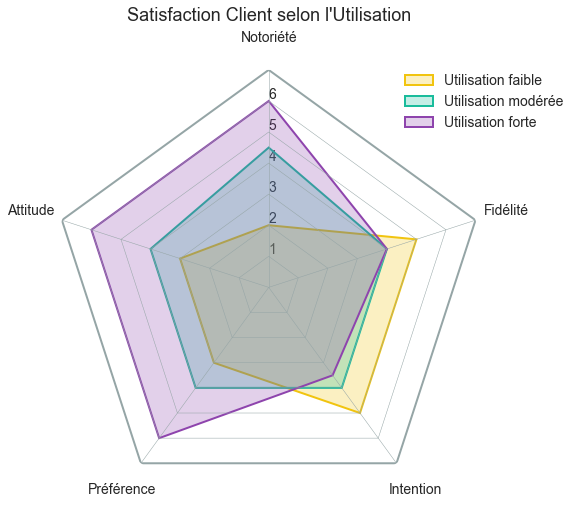

In [51]:
# pour convertir une couleur
converter = ColorConverter()

# angles
theta = [np.radians(t) for t in range(0, 360, 72)]

# figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# boucle sur les lignes
for index, line in ut3.iterrows():
    # get radius
    r = line[1:6]

    # add plots, option closed=True to close the polygon
    ax.fill(theta, r, closed=True, linewidth=2, label=line.Nom,
           facecolor=converter.to_rgba(line.Couleur, alpha=.25), edgecolor=line.Couleur)

# r grid
rmax = 7
ax.grid(False)
ax.set_rgrids(range(1, rmax), angle=0)
ax.set_rlim((0, rmax))
for r in range(1, rmax):
    ax.fill(theta, 5 * [r], facecolor=(1, 1, 1, 0),  edgecolor="#95a5a6", linewidth=.5, closed=True)
ax.fill(theta, 5 * [rmax], facecolor=(1, 1, 1, 0), edgecolor="#95a5a6", linewidth=2, closed=True)
for t in theta:
    ax.plot((t, t), (0, rmax), color="#95a5a6", linewidth=.5)

# theta grid
ax.set_thetagrids([t for t in range(0, 360, 72)], 
                  labels=["Notoriété", "Attitude", "Préférence", "Intention", "Fidélité"],
                  fontsize=14,
                  frac=1.15)
ax.set_theta_zero_location("N")

# remove circle frame
ax.set_frame_on(False)

# title
ax.set_title("Satisfaction Client selon l'Utilisation", fontsize=18, y=1.1)

# legende
ax.legend(loc=(.8, .85))

### Diagramme en barre

Nous créons ici un Bar Plot au format NPS (Promoteur, Neutre et Détracteur) sur chacune de nos variables de satisfaction client. Définition des catégories de Promoteurs, Détracteurs et des Neutres

In [42]:
def cat_cell(val):
    """ Retourne Détracteur si val < 5 ; Promoteur si val > 5 ; neutre sinon """
    if val < 5:
        cat = "Détracteur"
    elif val > 5:
        cat = "Promoteur"
    else:
        cat = "Neutre"

    return cat

In [46]:
nike_cat = nike[["Notoriété", "Attitude", "Préférence", "Intention", "Fidélité"]].applymap(cat_cell)
nike_cat.head()

Notoriété    Attitude  Préférence   Intention    Fidélité
Numéro                                                            
1        Promoteur   Promoteur      Neutre      Neutre   Promoteur
2       Détracteur  Détracteur  Détracteur   Promoteur      Neutre
3       Détracteur  Détracteur   Promoteur   Promoteur   Promoteur
4        Promoteur      Neutre      Neutre  Détracteur  Détracteur
5           Neutre  Détracteur   Promoteur  Détracteur  Détracteur

In [49]:
# on compte le nombre de chaque catégorie dans chaque variable
nike_cat.apply(pd.value_counts)
# calcul du poourcentage
nrows, ncols = nike_cat.shape
nike_percent = nike_cat.apply(pd.value_counts) / nrows * 100
# transposition du tableau
nike_percent_t = nike_percent.transpose()
nike_percent_t

Détracteur     Neutre  Promoteur
Notoriété    51.219512  14.634146  34.146341
Attitude     60.975610   9.756098  29.268293
Préférence   60.975610  14.634146  24.390244
Intention    58.536585  19.512195  21.951220
Fidélité     53.658537  24.390244  21.951220

Créons maintenant un `bar plot`: 

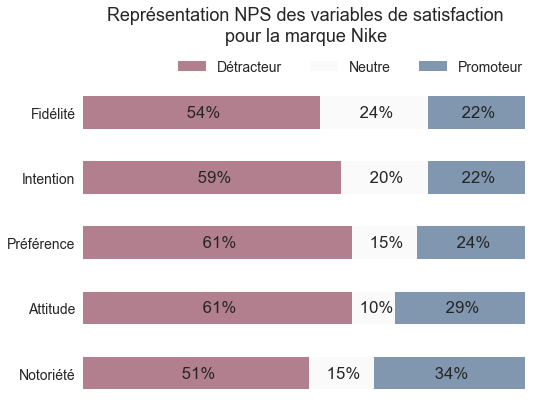

In [52]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

nike_percent_t.plot(kind="barh", stacked=True, ax=ax, colormap="RdBu", 
                    alpha=0.5, xlim=(0, 101), fontsize=14)

# y est la hauteur du graphique
y = 0
for index, row in nike_percent_t.iterrows():
    # calcul des limites de chaque intervalle
    xbounds = [0]
    for i in range(len(row)):
        xbounds.append(xbounds[i] + row[i])
        
    # on ajoute un texte au centre de chaque intervalle
    for i in range(3):
        x = (xbounds[i] + xbounds[i+1]) / 2
        ax.text(x, y, "%3.0f%%" % row[i], 
                verticalalignment="center",
                horizontalalignment="center")
    y += 1
    
ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.6, 1.1), fontsize=14)

ax.set_frame_on(False)
ax.set_xticklabels([])
ax.grid(False)
ax.set_title("Représentation NPS des variables de satisfaction\npour la marque Nike", fontsize=18, y=1.1)